Server Information:
You are using Jupyter notebook.

The version of the notebook server is: 5.7.8
The server is running on this version of Python:
Python 3.6.6 |Anaconda, Inc.| (default, Oct  9 2018, 12:34:16) 
[GCC 7.3.0]

Current Kernel Information:
Python 3.6.6 |Anaconda, Inc.| (default, Oct  9 2018, 12:34:16) 
Type 'copyright', 'credits' or 'license' for more information
IPython 7.5.0 -- An enhanced Interactive Python. Type '?' for help.

In [1]:
#### Implement Embeddings and evaluate them using text classification
## Key Source - https://towardsdatascience.com/understanding-feature-engineering-part-4-deep-learning-methods-for-text-data-96c44370bbfa
## Algos implemented - Word2Vec, GloVe and FastText

In [ ]:
###### STEPS:

#### Embeddings Generation - Word2Vec
#### Embeddings Generation - Gensim-Word2Vec
#### Text Classification Accuracy - Gensim-Word2Vec

#### Embeddings Generation - GloVe
#### Text Classification Accuracy - GloVe

#### Embeddings Generation - FastText
#### Text Classification Accuracy - FastText

In [ ]:
###############################################################
################ Embeddings Generation - Word2Vec
###############################################################

In [ ]:
###############################################################
################ Embeddings Generation - Gensim-Word2Vec
###############################################################

In [ ]:
###############################################################
################ Text Classification Accuracy - Gensim-Word2Vec
###############################################################

In [ ]:
###############################################################
################ Embeddings Generation - GloVe
###############################################################

In [ ]:
###############################################################
################ Text Classification Accuracy - GloVe
###############################################################

In [ ]:
###############################################################
################ Embeddings Generation - FastText
###############################################################

In [ ]:
###############################################################
################ Text Classification Accuracy - FastText
###############################################################

In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np  
import re  # regular expressions like '+', '*'
import nltk  # The Natural Language Toolkit
from sklearn.datasets import load_files  
# nltk.download('popular') 
# will download stopwords, punkt etc # download in default dir else error later on
import pickle  
from nltk.corpus import stopwords
from nltk import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [2]:
## importing data
# Windows 
# hollybolly_inc=pd.read_excel("C:/Users/anurag.trivedi/Dropbox/Job 06 Sep 2018/prep/13. Data/1. Real Data/11. Text Classification Data/1. HollyBolly/HollyBolly Increased.xlsx",sheet_name='HollyBolly Increased')
# Linux
hollybolly_inc=pd.read_csv("/home/antrived/Dropbox/Job-25-Feb-2019/prep/13. Data/1. Real Data/11. Text Classification Data/1. HollyBolly/HollyBolly_Increased_V2.csv", encoding='ISO-8859-1')
hollybolly = hollybolly_inc
hollybolly.head(10)

,Industry,Wiki_Text
0,Hollywood,is a neighborhood in the central region of Los...
1,Hollywood,including several of its historic studios. Its...
2,Hollywood,"ethnically diverse, densely populated, economi..."
3,Hollywood,Hollywood was a small community in 1870 and wa...
4,Hollywood,"1910, and soon thereafter a prominentÂ film in..."
5,Hollywood,"In 1853, oneÂ adobeÂ hut stood in Nopalera (No..."
6,Hollywood,community flourished. The area was known as th...
7,Hollywood,"According to the diary ofÂ H.Â J. Whitley, kno..."
8,Hollywood,carrying wood. The man got out of the wagon an...
9,Hollywood,represent England and wood would represent his...


In [3]:
## Labelling
hollybolly.Industry[hollybolly.Industry == "Hollywood"] = 1
hollybolly.Industry[hollybolly.Industry == "Bollywood"] = 0

In [4]:
Y = hollybolly.iloc[:,0].values
type(Y) # numpy array
Y
# sum(hollybolly.Industry)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=object)

In [5]:
X = hollybolly.iloc[:,1].values.tolist() 
print(type(X)) # X is list
print(X)

<class 'list'>
['is a neighborhood in the central region of Los Angeles, California. The neighborhood is notable for its place as the home of the U.S. film industry, ', 'including several of its historic studios. Its name has come to be aÂ\xa0metonymfor theÂ\xa0motion picture industry of the United States. Hollywood is also a highlyÂ\xa0', 'ethnically diverse, densely populated, economically diverse neighborhood and retail business district.', 'Hollywood was a small community in 1870 and was incorporated as a municipality in 1903.[3][4]Â\xa0It officially merged with the city of Los Angeles inÂ\xa0', '1910, and soon thereafter a prominentÂ\xa0film industryÂ\xa0began to emerge, eventually becoming the most recognizable film industry in the world.[5][6]', 'In 1853, oneÂ\xa0adobeÂ\xa0hut stood in Nopalera (NopalÂ\xa0field), named for the MexicanÂ\xa0Nopal cactusÂ\xa0indigenous to the area. By 1870, an agriculturalÂ\xa0', 'community flourished. The area was known as theÂ\xa0Cahuenga Valley,

In [6]:
## Cleaning - run either Clean1 or Clean2

In [7]:
# Clean1 (run either Clean1 or Clean2)
    # removes stopwords, special chars, nums, extra spaces, to lower case etc. (better code)
    # removes unicode characters

    
def remove_stopwords(sentence):
    stop_words = set(stopwords.words("english"))
    return " ".join([word.lower() for word in word_tokenize(sentence)
                    if word.lower() not in stop_words and word.isalpha()])


def clean_stopw_more(text1):
    # removes stopwords, special chars, nums, extra spaces, to lower case etc. (better code)
    # works on list of strings
    documents = []
    for sen in text1:
        documents.append(remove_stopwords(sen))
    return documents


def clean_unicode(text1):
    # removes unicode characters
    # works on list of strings
    documents = []
    for sen in text1:
        sen = str(sen.encode('ascii','ignore'))
        sen = sen[2:]
        sen = sen[:-1]
        sen = " ".join(sen.split())
        documents.append(remove_stopwords(sen))
    return documents


# Lemmatize with POS Tag
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)


def lemmatize(text1):
    # lemmitizes
    # works on list of strings
    documents = []
    lemmatizer = WordNetLemmatizer() 
    for sen in text1:      
        document = ""
        for word in sen.split():
#             word1 = lemmatizer.lemmatize(word) # only removes 's' at the end of nouns as of now
#             word1 = lemmatizer.lemmatize(word, pos ="a") # also converts adjective 'better' to 'good'
            word1 = lemmatizer.lemmatize(word, get_wordnet_pos(word)) # as per word's POS tag
            document = (''.join(document+" "+word1)).strip()
        documents.append(document)
    return documents


X = clean_stopw_more(X)
X = clean_unicode(X)
X = lemmatize(X)
print(X)

['neighborhood central region los angeles california neighborhood notable place home film industry', 'include several historic studio name come metonymfor motion picture industry united state hollywood also highly', 'ethnically diverse densely populate economically diverse neighborhood retail business district', 'hollywood small community incorporate municipality officially merge city los angeles', 'soon thereafter prominent film industry begin emerge eventually become recognizable film industry world', 'one adobe hut stood nopalera nopal field name mexican nopal cactus indigenous area agricultural', 'community flourish area know cahuenga valley pas santa monica mountain immediately north', 'accord diary whitley know father hollywood honeymoon stood top hill look valley along come chinese man wagon', 'carry wood man get wagon bow chinese man ask reply meaning wood whitley epiphany decide name new town hollywood holly would', 'represent england wood would represent scottish heritage whi

In [177]:
###############################################################
################ Embeddings Generation - Word2Vec
###############################################################

In [166]:
## Creating Word2Vec model
    # Note: training time taking

In [167]:
from keras.preprocessing import text
from keras.utils import np_utils
from keras.preprocessing import sequence

In [168]:
tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(X)
word2id = tokenizer.word_index

# build vocabulary of unique words
word2id['PAD'] = 0
id2word = {v:k for k, v in word2id.items()}
wids = [[word2id[w] for w in text.text_to_word_sequence(doc)] for doc in X]

vocab_size = len(word2id)
# Tunable parameters:
embed_size = 100 # Typically, the dimensionality of the vectors is set to be between 100 and 1,000
                 # Quality of word embedding increases with higher dimensionality. But after reaching some point, marginal gain will diminish
window_size = 5 # According to the authors' note, the recommended value is 10 for skip-gram and 5 for CBOW
                
    
print('Vocabulary Size:', vocab_size)
print('Vocabulary Sample:', list(word2id.items())[:10])

Vocabulary Size: 1655
Vocabulary Sample: [('film', 1), ('movie', 2), ('also', 3), ('hollywood', 4), ('make', 5), ('like', 6), ('actor', 7), ('name', 8), ('one', 9), ('cinema', 10)]


In [169]:
def generate_context_word_pairs(corpus, window_size, vocab_size):
    context_length = window_size*2
    for words in corpus:
        sentence_length = len(words)
        for index, word in enumerate(words):
            context_words = []
            label_word   = []            
            start = index - window_size
            end = index + window_size + 1
            
            context_words.append([words[i] 
                                 for i in range(start, end) 
                                 if 0 <= i < sentence_length 
                                 and i != index])
            label_word.append(word)

            x = sequence.pad_sequences(context_words, maxlen=context_length)
            y = np_utils.to_categorical(label_word, vocab_size)
            yield (x, y)
            
            
# Test this out for some samples
i = 0
for x, y in generate_context_word_pairs(corpus=wids, window_size=window_size, vocab_size=vocab_size):
    if 0 not in x[0]:
        print('Context (X):', [id2word[w] for w in x[0]], '-> Target (Y):', id2word[np.argwhere(y[0])[0][0]])
    
        if i == 10:
            break
        i += 1

Context (X): ['neighborhood', 'central', 'region', 'los', 'angeles', 'neighborhood', 'notable', 'place', 'home', 'film'] -> Target (Y): california
Context (X): ['central', 'region', 'los', 'angeles', 'california', 'notable', 'place', 'home', 'film', 'industry'] -> Target (Y): neighborhood
Context (X): ['include', 'several', 'historic', 'studio', 'name', 'metonymfor', 'motion', 'picture', 'industry', 'united'] -> Target (Y): come
Context (X): ['several', 'historic', 'studio', 'name', 'come', 'motion', 'picture', 'industry', 'united', 'state'] -> Target (Y): metonymfor
Context (X): ['historic', 'studio', 'name', 'come', 'metonymfor', 'picture', 'industry', 'united', 'state', 'hollywood'] -> Target (Y): motion
Context (X): ['studio', 'name', 'come', 'metonymfor', 'motion', 'industry', 'united', 'state', 'hollywood', 'also'] -> Target (Y): picture
Context (X): ['name', 'come', 'metonymfor', 'motion', 'picture', 'united', 'state', 'hollywood', 'also', 'highly'] -> Target (Y): industry
Conte

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 10, 100)           165500    
_________________________________________________________________
lambda_3 (Lambda)            (None, 100)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 1655)              167155    
Total params: 332,655
Trainable params: 332,655
Non-trainable params: 0
_________________________________________________________________
None


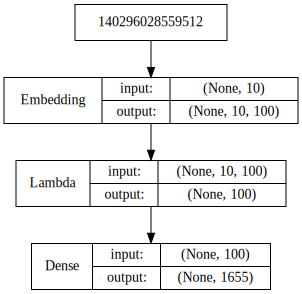

In [170]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Embedding, Lambda
# conda install graphviz
# conda install pydotplus

# build CBOW architecture
cbow = Sequential()
cbow.add(Embedding(input_dim=vocab_size, output_dim=embed_size, input_length=window_size*2))
cbow.add(Lambda(lambda x: K.mean(x, axis=1), output_shape=(embed_size,)))
cbow.add(Dense(vocab_size, activation='softmax'))
cbow.compile(loss='categorical_crossentropy', optimizer='rmsprop')

# view model summary
print(cbow.summary())

# visualize model structure
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import keras
import pydot
keras.utils.vis_utils.pydot = pydot

SVG(model_to_dot(cbow, show_shapes=True, show_layer_names=False, 
                 rankdir='TB').create(prog='dot', format='svg'))

In [149]:
for epoch in range(1, 6):
    loss = 0.
    i = 0
    for x, y in generate_context_word_pairs(corpus=wids, window_size=window_size, vocab_size=vocab_size):
        i += 1
        loss += cbow.train_on_batch(x, y)
        if i % 100000 == 0:
            print('Processed {} (context, word) pairs'.format(i))

    print('Epoch:', epoch, '\tLoss:', loss)
    print()

Epoch: 1 	Loss: 21634.459156513214

Epoch: 2 	Loss: 20992.294375896454

Epoch: 3 	Loss: 20650.47307932377

Epoch: 4 	Loss: 20435.252402067184

Epoch: 5 	Loss: 20388.28981935978



In [150]:
weights = cbow.get_weights()[0]
weights = weights[1:]
print(weights.shape)

pd.DataFrame(weights, index=list(id2word.values())[1:]).head()

(1654, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
movie,-0.334043,0.083855,-0.131325,-0.182039,0.257532,-0.143698,-0.009579,0.215841,-0.142686,0.109679,...,0.278353,-0.016151,0.354830,0.127030,0.148275,0.177010,-0.207433,0.149154,-0.141244,-0.154270
also,0.010398,0.057694,0.140365,-0.188692,0.065585,-0.045620,-0.003918,0.026590,0.032038,-0.009219,...,0.078456,-0.114912,-0.294127,-0.088587,0.054760,0.015786,0.171093,-0.077207,-0.157119,0.010037
hollywood,-0.064275,-0.127071,0.102927,-0.134872,0.229966,-0.077076,0.007508,-0.099740,0.021691,0.045126,...,0.097467,0.013473,-0.100233,-0.044264,0.085443,0.051868,0.016107,-0.095814,-0.240202,-0.077262
make,0.309155,-0.028272,0.021489,0.018961,-0.180598,-0.002444,-0.182196,0.083872,0.377354,-0.024463,...,-0.045335,0.200182,-0.016402,0.015079,-0.112188,0.054826,0.384337,-0.093122,-0.086162,-0.143059
like,-0.101427,-0.158749,0.068410,-0.072489,-0.085943,-0.130045,-0.090669,-0.028086,-0.196463,-0.051677,...,-0.047815,0.066962,-0.225218,-0.053311,0.181727,0.029159,0.206783,-0.158792,-0.166766,-0.189482


In [151]:
from sklearn.metrics.pairwise import euclidean_distances

# compute pairwise distance matrix
distance_matrix = euclidean_distances(weights)
print(distance_matrix.shape)

# view contextually similar words
similar_words = {search_term: [id2word[idx] for idx in distance_matrix[word2id[search_term]-1].argsort()[1:6]+1] 
                   for search_term in ['los','bollywood','california','hollywood','voting','western','bengali','amitabh','bombay','blackbuck','baahubali']}

# similar_words = {search_term: [id2word[idx] for idx in distance_matrix[word2id[search_term]-1].argsort()[1:6]+1] 
#                    for search_term in ['los','bollywood','california','hollywood']}


similar_words

(1654, 1654)


{'los': ['angeles', 'hotel', 'california', 'whitley', 'wilcox'],
 'bollywood': ['refer', 'regional', 'coin', 'tollywood', 'bengali'],
 'california': ['wilcox', 'hotel', 'area', 'neighborhood', 'several'],
 'hollywood': ['know', 'sell', 'whitley', 'stood', 'field'],
 'voting': ['ballot', 'absentee', 'voter', 'despite', 'declare'],
 'western': ['shree', 'promote', 'ke', 'popularise', 'kaul'],
 'bengali': ['mainly', 'benegal', 'talkie', 'emergence', 'se'],
 'amitabh': ['kaul', 'devotional', 'b', 'position', 'ajay'],
 'bombay': ['derive', 'amend', 'establish', 'content', 'neighbor'],
 'blackbuck': ['daddy', 'remains', 'jodhpur', 'debut', 'statesman'],
 'baahubali': ['endhiran', 'stun', 'pundit', 'note', 'dolly']}

In [152]:
# visualize in 2-D using t-SNE
    # t-SNE - theory - https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding

Total words: 66 	Word Embedding shapes: (66, 100)


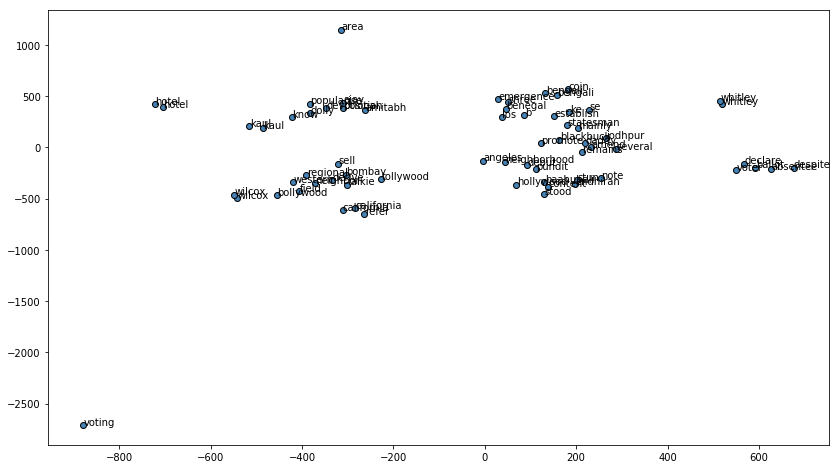

In [153]:

from sklearn.manifold import TSNE

words = sum([[k] + v for k, v in similar_words.items()], [])
words_ids = [word2id[w] for w in words]
word_vectors = np.array([weights[idx] for idx in words_ids])
print('Total words:', len(words), '\tWord Embedding shapes:', word_vectors.shape)

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=3)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(word_vectors)
labels = words

plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1], c='steelblue', edgecolors='k')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [ ]:
###############################################################
################ Embeddings Generation - Gensim-Word2Vec
###############################################################

In [ ]:
############# Gensim Optimized Implementation ###############

In [135]:
## Gensim Optimized Implementation
    # really faster than training vanilla wordvec
    # here we tune/re-train the gensim pre-trained model, refer this:
        # https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

In [8]:
from gensim.models import word2vec
# pip install gensim

# tokenize sentences in corpus
wpt = nltk.WordPunctTokenizer()
tokenized_corpus = [wpt.tokenize(document) for document in X]

# Set values for various parameters
feature_size = 100    # Word vector dimensionality (ref. had 100)
window_context = 30          # Context window size (ref. had 30)                                                                                  
min_word_count = 1   # Minimum word count (ref. had 1)                       
sample = 1e-3   # Downsample setting for frequent words (ref. had 1e-3)

# train model
w2v_model = word2vec.Word2Vec(tokenized_corpus, size=feature_size, 
                          window=window_context, min_count=min_word_count,
                          sample=sample, iter=50)

# select cbow or skip_gram
# param sg=0/1 decides whether to use the skip-gram model (1) or CBOW (0)
# https://stackoverflow.com/questions/39552088/select-between-skip-gram-and-cbow-model-for-training-word2vec-in-gensim

# this part is for visualization:
# view similar words based on gensim's model
similar_words = {search_term: [item[0] for item in w2v_model.wv.most_similar([search_term], topn=5)]
                  for search_term in ['los','bollywood','california','hollywood','voting','western','bengali','amitabh','bombay','blackbuck','baahubali']}
# similar_words = {search_term: [item[0] for item in w2v_model.wv.most_similar([search_term], topn=5)]
#                   for search_term in ['los','bollywood','california','hollywood']}

similar_words

{'los': ['angeles', 'city', 'hollywood', 'hotel', 'california'],
 'bollywood': ['use', 'two', 'cinema', 'name', 'india'],
 'california': ['hollywood', 'city', 'los', 'rise', 'say'],
 'hollywood': ['first', 'actress', 'new', 'star', 'say'],
 'voting': ['charge', 'people', 'even', 'fill', 'face'],
 'western': ['start', 'well', 'much', 'include', 'time'],
 'bengali': ['movement', 'parallel', 'cinema', 'commercial', 'hindi'],
 'amitabh': ['cinema', 'film', 'indian', 'mark', 'great'],
 'bombay': ['sona', 'married', 'u', 'name', 'however'],
 'blackbuck': ['lawrence', 'kill', 'come', 'don', 'pose'],
 'baahubali': ['follow', 'performance', 'one', 'aerosmith', 'seem']}

In [30]:
# # visualizing using t-SNE

# from sklearn.manifold import TSNE

# words = sum([[k] + v for k, v in similar_words.items()], [])
# wvs = w2v_model.wv[words]

# tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)
# np.set_printoptions(suppress=True)
# T = tsne.fit_transform(wvs)
# labels = words

# plt.figure(figsize=(14, 8))
# plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
# for label, x, y in zip(labels, T[:, 0], T[:, 1]):
#     plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [ ]:
def average_word_vectors(words, model, vocabulary, num_features):
    
    feature_vector = np.zeros((num_features,),dtype="float64")
    nwords = 0.
    
    for word in words:
        if word in vocabulary: 
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model[word])
    
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
        
    return feature_vector
   
def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index2word)
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)


# get document level embeddings
w2v_feature_array = averaged_word_vectorizer(corpus=tokenized_corpus, model=w2v_model,
                                             num_features=feature_size)
pd.DataFrame(w2v_feature_array)

In [ ]:
X = w2v_feature_array

In [ ]:
###############################################################
################ Text Classification Accuracy - Gensim-Word2Vec
###############################################################

In [208]:
## Sampling

In [11]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=12)
Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)
# print(len(X_train)) # 119
# print(len(X_test)) # 51

In [12]:
X_train = np.asmatrix(X_train)
print(X_train)
X_test = np.asmatrix(X_test)
print(X_test)

[[-0.01131674  0.12013239 -0.4042742  ...  0.08783821 -0.12023789
  -0.12257169]
 [-0.01171004  0.13687019 -0.46721459 ...  0.10864651 -0.14366391
  -0.13908067]
 [-0.01518956  0.13065485 -0.44783612 ...  0.1026119  -0.13733978
  -0.13324542]
 ...
 [-0.01100176  0.08005441 -0.2756313  ...  0.06218941 -0.0859655
  -0.07915801]
 [-0.01259802  0.11253671 -0.40782426 ...  0.09185976 -0.11877396
  -0.11883401]
 [-0.01187696  0.14634616 -0.50022642 ...  0.11420978 -0.15185857
  -0.14449064]]
[[-0.00771002  0.12240923 -0.40578516 ...  0.08911934 -0.12199145
  -0.11846909]
 [-0.01003699  0.07487516 -0.2573943  ...  0.06124223 -0.07574625
  -0.07579294]
 [-0.00704088  0.08054002 -0.28078838 ...  0.0638036  -0.08565755
  -0.08578628]
 ...
 [-0.00610127  0.0777188  -0.25497205 ...  0.0581081  -0.07876555
  -0.07573028]
 [-0.00747438  0.07444933 -0.26391739 ...  0.06048374 -0.07917389
  -0.0733586 ]
 [-0.01046814  0.10255512 -0.36353048 ...  0.081932   -0.10934986
  -0.10455875]]


In [13]:
# Import classification related packages
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report

In [14]:
############# Random Forest ###############

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
# Training
def rf_classifier(X_train, Y_train, n_estimators, max_depth, max_features, random_state):
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, max_features=max_features, random_state=random_state)   
    Y_train = np.asarray(Y_train, dtype="|S6")
    model.fit(X_train, Y_train)
    return model

def rf_predictions(model, X_test, Y_test):
    y_pred = model.predict_proba(X_test) # default 'predict' gives 'categorical' predictions for RF
    # classifier.classes_ # to check order of classes in 'predict_proba' (most prob. it's 0,1...)
    y_pred = y_pred[:,1] # accessing 2nd column or '1' class probabilities
    # converting prob to 1/0 and array type to int
    y_pred[y_pred > 0.5] = 1
    y_pred[y_pred <= 0.5] = 0
    return y_pred
    
def create_reports(y_pred, Y_test):
    # creating CF matrix
    Y_test = Y_test.astype(int)
    y_pred = y_pred.astype(int)
    cm1 = confusion_matrix(y_pred, Y_test)
    print("\n--Confusion Matrix--\n")
    print(cm1)
    # calculating auc
    fp_rate, tp_rate, thresholds = roc_curve(Y_test, y_pred)
    print("\n-------AUC-------\n")
    print(auc(fp_rate, tp_rate))
    print("\n----------------Classification_Report------------------\n")
    print(classification_report(Y_test, y_pred))

In [45]:
model = rf_classifier(X_train, Y_train, n_estimators=400, max_depth=10, max_features=20, random_state=0)
y_pred = rf_predictions(model, X_test, Y_test)
create_reports(y_pred, Y_test)


--Confusion Matrix--

[[27 17]
 [ 0  7]]

-------AUC-------

0.6458333333333334

----------------Classification_Report------------------

              precision    recall  f1-score   support

           0       0.61      1.00      0.76        27
           1       1.00      0.29      0.45        24

   micro avg       0.67      0.67      0.67        51
   macro avg       0.81      0.65      0.61        51
weighted avg       0.80      0.67      0.62        51



In [18]:
# Insight: Performance improved drastically over RF using regular text classification
    # refer: '9.1 Text Classification-One txt column' notebook

In [19]:
############# Linear/Non-Linear SVM ###############

In [20]:
from sklearn.svm import SVC 

In [21]:
# Training
def svm_classifier(X_train, Y_train, kernel, C, gamma):
    model = SVC(kernel=kernel, C=C, gamma=gamma) # kernel = rbf/linear 
    model.fit(X_train, Y_train) 
    return model

def common_predictions(model, X_test, Y_test):
    y_pred = model.predict(X_test)
    y_pred = y_pred.astype(int)
    y_pred[y_pred > 0.5] = 1
    y_pred[y_pred <= 0.5] = 0
    return y_pred

In [42]:
model = svm_classifier(X_train, Y_train, kernel='rbf', C=300, gamma=10)
y_pred = common_predictions(model, X_test, Y_test)
create_reports(y_pred, Y_test)


--Confusion Matrix--

[[25 10]
 [ 2 14]]

-------AUC-------

0.7546296296296297

----------------Classification_Report------------------

              precision    recall  f1-score   support

           0       0.71      0.93      0.81        27
           1       0.88      0.58      0.70        24

   micro avg       0.76      0.76      0.76        51
   macro avg       0.79      0.75      0.75        51
weighted avg       0.79      0.76      0.76        51



In [319]:
# Insight: performance of SVM dipped by using word2vec
    # because number of vars have reduced from 1500 to 100 and N performs well with more vars
    # refer: '9.1 Text Classification-One txt column' notebook

In [320]:
############# Naive Bayes ###############

In [46]:
from sklearn.naive_bayes import GaussianNB

In [47]:
# Training
def nb_classifier(X_train, Y_train):
    model = GaussianNB()
    temp = X_train.copy()
    model.fit(temp, Y_train)
    return model

In [48]:
model = nb_classifier(X_train, Y_train)
y_pred = common_predictions(model, X_test, Y_test)
create_reports(y_pred, Y_test)


--Confusion Matrix--

[[ 9  7]
 [18 17]]

-------AUC-------

0.5208333333333334

----------------Classification_Report------------------

              precision    recall  f1-score   support

           0       0.56      0.33      0.42        27
           1       0.49      0.71      0.58        24

   micro avg       0.51      0.51      0.51        51
   macro avg       0.52      0.52      0.50        51
weighted avg       0.53      0.51      0.49        51



In [82]:
# Insight: performance of NB dipped by using word2vec
    # because number of vars have reduced from 1500 to 100 and N performs well with more vars
    # refer: '9.1 Text Classification-One txt column' notebook

In [ ]:
############ LR ############

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
# Training
def lr_classifier(X_train, Y_train, C):
    model = LogisticRegression(C=C) # Inverse of regularization strength
    model.fit(X_train, Y_train)
    return model

In [65]:
model = lr_classifier(X_train, Y_train, C=50000)
y_pred = common_predictions(model, X_test, Y_test)
create_reports(y_pred, Y_test)


--Confusion Matrix--

[[23 12]
 [ 4 12]]

-------AUC-------

0.6759259259259258

----------------Classification_Report------------------

              precision    recall  f1-score   support

           0       0.66      0.85      0.74        27
           1       0.75      0.50      0.60        24

   micro avg       0.69      0.69      0.69        51
   macro avg       0.70      0.68      0.67        51
weighted avg       0.70      0.69      0.68        51



/home/antrived/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [ ]:
# LR performance improved significantly by using word2vec
    # refer: '9.1 Text Classification-One txt column' notebook

In [83]:
############ XGBoost #############

In [66]:
# conda install -c conda-forge xgboost # some issues
# sudo pip install xgboost
from xgboost import XGBClassifier

In [67]:
# Training
def xgb_classifier(X_train, Y_train, max_depth, learning_rate, n_estimators, objective):
    model = XGBClassifier(max_depth=max_depth, learning_rate=learning_rate, n_estimators=n_estimators, objective=objective)
    model.fit(X_train, Y_train)
    return model

In [79]:
model = xgb_classifier(X_train, Y_train, max_depth=5, learning_rate=0.01, n_estimators=500, objective='binary:logistic')
y_pred = common_predictions(model, X_test, Y_test)
create_reports(y_pred, Y_test)


--Confusion Matrix--

[[25 12]
 [ 2 12]]

-------AUC-------

0.7129629629629629

----------------Classification_Report------------------

              precision    recall  f1-score   support

           0       0.68      0.93      0.78        27
           1       0.86      0.50      0.63        24

   micro avg       0.73      0.73      0.73        51
   macro avg       0.77      0.71      0.71        51
weighted avg       0.76      0.73      0.71        51



In [ ]:
# XGBoost performance improved significantly by using word2vec
    # refer: '9.1 Text Classification-One txt column' notebook

In [190]:
############ ANN #############

In [80]:
# importing keras libraries and packages:
import keras
from keras.models import Sequential # to initialize the ANN
from keras.layers import Dense # to create layers of ANN
from keras.layers import Dropout

Using TensorFlow backend.


In [85]:
# Creating Basic ANN

np.random.seed(100) # works. gives close results on repeating but not exactly same.

# Initializing ANN
model = Sequential()

i = 0.20
j = 125

# Adding input layer and 1st hidden layer
model.add(Dense(activation="relu", input_dim=100, units=j, kernel_initializer="uniform"))
# model.add(Dropout(rate=i))
# Adding 2nd hidden layer
model.add(Dense(activation="relu", units=j, kernel_initializer="uniform"))
# model.add(Dropout(rate=i))
model.add(Dense(activation="relu", units=j, kernel_initializer="uniform"))
# model.add(Dropout(rate=i))
model.add(Dense(activation="relu", units=j, kernel_initializer="uniform"))
# model.add(Dropout(rate=i))
model.add(Dense(activation="relu", units=j, kernel_initializer="uniform"))
# model.add(Dropout(rate=i))
model.add(Dense(activation="relu", units=j, kernel_initializer="uniform"))
# model.add(Dropout(rate=i))
model.add(Dense(activation="relu", units=j, kernel_initializer="uniform"))
# model.add(Dropout(rate=i))
model.add(Dense(activation="relu", units=j, kernel_initializer="uniform"))
# model.add(Dropout(rate=i))
# model.add(Dense(activation="relu", units=j, kernel_initializer="uniform"))
# model.add(Dense(activation="relu", units=j, kernel_initializer="uniform"))
# model.add(Dense(activation="relu", units=j, kernel_initializer="uniform"))
# model.add(Dense(activation="relu", units=j, kernel_initializer="uniform"))
# model.add(Dense(activation="relu", units=j, kernel_initializer="uniform"))
# model.add(Dense(activation="relu", units=j, kernel_initializer="uniform"))
# model.add(Dense(activation="relu", units=j, kernel_initializer="uniform"))
# model.add(Dense(activation="relu", units=j, kernel_initializer="uniform"))
# model.add(Dense(activation="relu", units=j, kernel_initializer="uniform"))
# # Adding hidden layer
# classifier.add(Dense(activation="relu", units=70, kernel_initializer="uniform"))
# # Adding hidden layer
# classifier.add(Dense(activation="relu", units=7, kernel_initializer="uniform"))
# # Adding hidden layer

# Adding output layer
model.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

# Compiling the ANN (means run SGD on ANN)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fitting ANN to training set
model.fit(X_train, Y_train, batch_size=2, epochs=40)

Epoch 1/40
119/119 [==============================] - 1s 9ms/step - loss: 0.6913 - acc: 0.5630
Epoch 2/40
119/119 [==============================] - 0s 1ms/step - loss: 0.6808 - acc: 0.6134
Epoch 3/40
119/119 [==============================] - 0s 1ms/step - loss: 0.6739 - acc: 0.6134
Epoch 4/40
119/119 [==============================] - 0s 1ms/step - loss: 0.6744 - acc: 0.6134
Epoch 5/40
119/119 [==============================] - 0s 1ms/step - loss: 0.6699 - acc: 0.6134
Epoch 6/40
119/119 [==============================] - 0s 1ms/step - loss: 0.6706 - acc: 0.6134
Epoch 7/40
119/119 [==============================] - 0s 1ms/step - loss: 0.6705 - acc: 0.6134
Epoch 8/40
119/119 [==============================] - 0s 1ms/step - loss: 0.6703 - acc: 0.6134
Epoch 9/40
119/119 [==============================] - 0s 2ms/step - loss: 0.6722 - acc: 0.6134
Epoch 10/40
119/119 [==============================] - 0s 2ms/step - loss: 0.6702 - acc: 0.6134
Epoch 11/40
119/119 [============================

In [86]:
y_pred = common_predictions(model, X_test, Y_test)
create_reports(y_pred, Y_test)


--Confusion Matrix--

[[27 24]
 [ 0  0]]

-------AUC-------

0.5

----------------Classification_Report------------------

              precision    recall  f1-score   support

           0       0.53      1.00      0.69        27
           1       0.00      0.00      0.00        24

   micro avg       0.53      0.53      0.53        51
   macro avg       0.26      0.50      0.35        51
weighted avg       0.28      0.53      0.37        51



In [230]:
# NN not getting trained after using word2vec
    # refer: '9.1 Text Classification-One txt column' notebook
    # maybe because only 170 rows and 100 columns

In [ ]:
## GENSIM OUTCOME(compared with '9.1 Text Classification-One txt column' notebook): 
    # For individual models, embeddings generally outperform tf-idf
        # except naive_bayes and ANN, where tf-idf performs better
            # because these algos need high dimensionality to perform better
    # Gensim best acc is from SVM(rbf) - 0.75

In [ ]:
###############################################################
################ Text Classification Scoring
###############################################################

In [ ]:
# You can use 'averaged_word_vectorizer' for new incoming data (check above)
 # the way it is used for current 'tokenized_corpus'

In [ ]:
###############################################################
################ Text Classification Accuracy - GloVe
###############################################################

In [ ]:
###############################################################
################ Embeddings Generation - FastText
###############################################################

In [ ]:
###############################################################
################ Text Classification Accuracy - FastText
###############################################################